In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip" -d "/content/"


Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/annotations/Cars0.xml  
  inflating: /content/annotations/Cars1.xml  
  inflating: /content/annotations/Cars10.xml  
  inflating: /content/annotations/Cars100.xml  
  inflating: /content/annotations/Cars101.xml  
  inflating: /content/annotations/Cars102.xml  
  inflating: /content/annotations/Cars103.xml  
  inflating: /content/annotations/Cars104.xml  
  inflating: /content/annotations/Cars105.xml  
  inflating: /content/annotations/Cars106.xml  
  inflating: /content/annotations/Cars107.xml  
  inflating: /content/annotations/Cars108.xml  
  inflating: /content/annotations/Cars109.xml  
  inflating: /content/annotations/Cars11.xml  
  inflating: /content/annotations/Cars110.xml  
  inflating: /content/annotations/Cars111.xml  
  inflating: /content/annotations/Cars112.xml  
  inflating: /content/annotations/Cars113.xml  
  inflating: /content/annotations/Cars114.xml  
  inflating: /content/annotations/Cars115.xml  
 

In [ ]:
import os
# Vérifier les fichiers
print(os.listdir("/content/annotations"))

['Cars139.xml', 'Cars371.xml', 'Cars233.xml', 'Cars348.xml', 'Cars210.xml', 'Cars344.xml', 'Cars246.xml', 'Cars256.xml', 'Cars133.xml', 'Cars65.xml', 'Cars426.xml', 'Cars260.xml', 'Cars272.xml', 'Cars319.xml', 'Cars424.xml', 'Cars342.xml', 'Cars94.xml', 'Cars101.xml', 'Cars67.xml', 'Cars205.xml', 'Cars212.xml', 'Cars295.xml', 'Cars289.xml', 'Cars194.xml', 'Cars382.xml', 'Cars142.xml', 'Cars207.xml', 'Cars367.xml', 'Cars85.xml', 'Cars165.xml', 'Cars296.xml', 'Cars338.xml', 'Cars61.xml', 'Cars216.xml', 'Cars265.xml', 'Cars141.xml', 'Cars386.xml', 'Cars395.xml', 'Cars25.xml', 'Cars66.xml', 'Cars31.xml', 'Cars155.xml', 'Cars397.xml', 'Cars173.xml', 'Cars45.xml', 'Cars302.xml', 'Cars0.xml', 'Cars334.xml', 'Cars312.xml', 'Cars398.xml', 'Cars32.xml', 'Cars121.xml', 'Cars340.xml', 'Cars15.xml', 'Cars111.xml', 'Cars314.xml', 'Cars245.xml', 'Cars149.xml', 'Cars428.xml', 'Cars298.xml', 'Cars336.xml', 'Cars220.xml', 'Cars106.xml', 'Cars231.xml', 'Cars410.xml', 'Cars12.xml', 'Cars286.xml', 'Cars309

In [ ]:
# Vérifier les fichiers
print(os.listdir("/content/images"))

['Cars24.png', 'Cars364.png', 'Cars229.png', 'Cars221.png', 'Cars75.png', 'Cars349.png', 'Cars406.png', 'Cars146.png', 'Cars98.png', 'Cars77.png', 'Cars330.png', 'Cars96.png', 'Cars210.png', 'Cars148.png', 'Cars174.png', 'Cars36.png', 'Cars25.png', 'Cars81.png', 'Cars415.png', 'Cars66.png', 'Cars79.png', 'Cars154.png', 'Cars142.png', 'Cars225.png', 'Cars244.png', 'Cars241.png', 'Cars409.png', 'Cars94.png', 'Cars254.png', 'Cars7.png', 'Cars272.png', 'Cars362.png', 'Cars205.png', 'Cars52.png', 'Cars384.png', 'Cars223.png', 'Cars189.png', 'Cars185.png', 'Cars49.png', 'Cars319.png', 'Cars417.png', 'Cars175.png', 'Cars31.png', 'Cars84.png', 'Cars190.png', 'Cars366.png', 'Cars333.png', 'Cars293.png', 'Cars69.png', 'Cars168.png', 'Cars258.png', 'Cars339.png', 'Cars334.png', 'Cars370.png', 'Cars368.png', 'Cars21.png', 'Cars176.png', 'Cars51.png', 'Cars13.png', 'Cars159.png', 'Cars419.png', 'Cars286.png', 'Cars141.png', 'Cars28.png', 'Cars27.png', 'Cars429.png', 'Cars57.png', 'Cars432.png', 'Ca

In [ ]:
import os

image_files = set([f.replace(".png", "") for f in os.listdir("/content/images")])
annotation_files = set([f.replace(".xml", "") for f in os.listdir("/content/annotations")])

# Vérifier les images sans annotations
missing_annotations = image_files - annotation_files
missing_images = annotation_files - image_files

print(f"🚗 Nombre d'images : {len(image_files)}")
print(f"📝 Nombre d'annotations : {len(annotation_files)}")

if missing_annotations:
    print(f"⚠️ Images sans annotations : {missing_annotations}")

if missing_images:
    print(f"⚠️ Annotations sans images : {missing_images}")

if not missing_annotations and not missing_images:
    print("✅ Tout est bon, chaque image a son annotation !")

🚗 Nombre d'images : 433
📝 Nombre d'annotations : 433
✅ Tout est bon, chaque image a son annotation !


In [ ]:
import os
import xml.etree.ElementTree as ET

# Dossiers
annotations_dir = "/content/annotations"
images_dir = "/content/images"
labels_dir = "/content/labels"  # Dossier de sortie des annotations YOLO

# Créer le dossier des labels si non existant
os.makedirs(labels_dir, exist_ok=True)

# Dictionnaire des classes
classes = {"licence": 0}  # YOLO utilise des indices numériques pour chaque classe

# Fonction de conversion Pascal VOC → YOLO
def convert_voc_to_yolo(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_filename = root.find("filename").text
    image_path = os.path.join(images_dir, image_filename)

    img_width = int(root.find("size/width").text)
    img_height = int(root.find("size/height").text)

    yolo_annotation = []

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name not in classes:
            continue  # Ignorer les classes inconnues

        class_id = classes[class_name]

        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        # Convertir en format YOLO (normalisé)
        x_center = (xmin + xmax) / (2.0 * img_width)
        y_center = (ymin + ymax) / (2.0 * img_height)
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        yolo_annotation.append(f"{class_id} {x_center} {y_center} {width} {height}")

    # Sauvegarde dans un fichier texte
    txt_filename = os.path.join(labels_dir, image_filename.replace(".png", ".txt"))
    with open(txt_filename, "w") as f:
        f.write("\n".join(yolo_annotation))

# Convertir toutes les annotations
for xml_file in os.listdir(annotations_dir):
    if xml_file.endswith(".xml"):
        convert_voc_to_yolo(os.path.join(annotations_dir, xml_file))

print("✅ Conversion terminée ! Les annotations YOLO sont enregistrées dans /content/labels")


✅ Conversion terminée ! Les annotations YOLO sont enregistrées dans /content/labels


In [ ]:
import os
print(os.listdir("/content/labels")[:5])  # Affiche les 5 premiers fichiers d'annotations YOLO


['Cars364.txt', 'Cars163.txt', 'Cars7.txt', 'Cars62.txt', 'Cars147.txt']


In [ ]:
# Afficher le contenu d'un fichier d'annotation YOLO
file_path = "/content/labels/Cars163.txt"  # Remplace par un des fichiers générés
with open(file_path, "r") as f:
    print(f.read())


0 0.4915254237288136 0.5328571428571428 0.23728813559322035 0.07714285714285714


In [ ]:
import os
import random
import shutil

# Chemins des dossiers
images_dir = "/content/images"
labels_dir = "/content/labels"

train_images_dir = "/content/images/train"
val_images_dir = "/content/images/val"
train_labels_dir = "/content/labels/train"
val_labels_dir = "/content/labels/val"

# Création des dossiers
for d in [train_images_dir, val_images_dir, train_labels_dir, val_labels_dir]:
    os.makedirs(d, exist_ok=True)

# Lister toutes les images
image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]

# Mélanger les images
random.shuffle(image_files)

# Séparer 80% train / 20% val
split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Fonction pour déplacer les fichiers
def move_files(file_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    for file in file_list:
        # Déplacer l'image
        shutil.move(os.path.join(src_img_dir, file), os.path.join(dst_img_dir, file))

        # Déplacer l'annotation correspondante
        label_file = file.replace(".png", ".txt")
        if os.path.exists(os.path.join(src_lbl_dir, label_file)):
            shutil.move(os.path.join(src_lbl_dir, label_file), os.path.join(dst_lbl_dir, label_file))

# Déplacement des fichiers
move_files(train_files, images_dir, labels_dir, train_images_dir, train_labels_dir)
move_files(val_files, images_dir, labels_dir, val_images_dir, val_labels_dir)

print(f"✅ {len(train_files)} images pour l'entraînement")
print(f"✅ {len(val_files)} images pour la validation")


✅ 346 images pour l'entraînement
✅ 87 images pour la validation


In [ ]:
dataset_yaml = """path: /content
train: images/train
val: images/val

nc: 1
names: ["licence"]
"""

with open("/content/dataset.yaml", "w") as f:
    f.write(dataset_yaml)

print("✅ Fichier dataset.yaml créé !")


✅ Fichier dataset.yaml créé !


In [ ]:

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 829.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
# Vérifier l'installation
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Charger YOLOv8 au lieu de YOLOv11
model = YOLO("yolov8n.pt")  # Nano version (rapide et légère)
print("✅ YOLOv8 chargé avec succès !")


100%|██████████| 6.25M/6.25M [00:00<00:00, 92.0MB/s]


✅ YOLOv8 chargé avec succès !


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/dataset.yaml epochs=50 imgsz=640 batch=16 device=0


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

In [ ]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/Yolo_results/



In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Yolo_results/best.pt")  # Mets le bon chemin ici
results = model("/content/drive/MyDrive/pk images/pk2.jpg", save=True)



image 1/1 /content/drive/MyDrive/pk images/pk2.jpg: 480x640 1 licence, 7.9ms
Speed: 3.0ms preprocess, 7.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3


In [ ]:
# Display the image with predictions (assuming the result is from a single image)
results[0].show()  # This will display the first image in the results list


In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 22.4 MB/s eta 0:00:00


In [ ]:
!apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (15.8 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
!pip install ultralytics easyocr opencv-python matplotlib



0: 416x640 1 licence, 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
[2025/02/16 22:19:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/re

[2025/02/16 22:19:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0226593017578125
[2025/02/16 22:19:43] ppocr DEBUG: cls num  : 1, elapsed : 0.017996549606323242
[2025/02/16 22:19:43] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06268119812011719
EasyOCR Text: SNG66 XMz
PaddleOCR Text: SN66XMZ
Tesseract Text: ‘SNE6 XMZ
Final Plate Text: SNG66 XMz


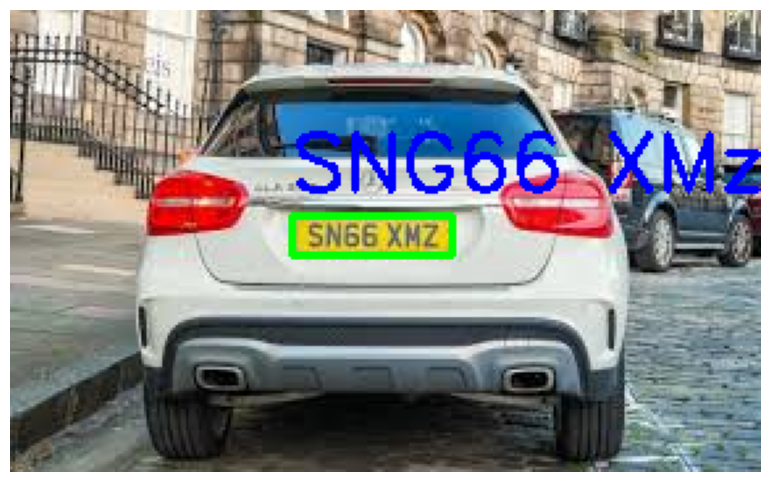

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from easyocr import Reader
from paddleocr import PaddleOCR
import pytesseract
import os
from google.colab.patches import cv2_imshow
from collections import Counter

# Load YOLO model
model = YOLO("/content/drive/MyDrive/Yolo_results/Yolo_results/best.pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/drive/MyDrive/a.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Initialize OCR models
easyocr_reader = Reader(["en", "fr"])  # EasyOCR
paddleocr_reader = PaddleOCR(use_angle_cls=True, lang="en")  # PaddleOCR

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    # Apply bilateral filter to remove noise while keeping edges sharp
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to select the best OCR result using a voting system
def get_best_ocr_result(easy_text, paddle_text, tess_text):
    ocr_texts = [easy_text, paddle_text, tess_text]
    most_common_text = Counter(ocr_texts).most_common(1)[0][0]
    return most_common_text

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run OCR (try EasyOCR, PaddleOCR, and Tesseract)
        easy_result = easyocr_reader.readtext(processed_plate)
        paddle_result = paddleocr_reader.ocr(processed_plate)
        tess_result = pytesseract.image_to_string(processed_plate, lang='eng')

        # Extract text (print results to debug)
        easy_text = easy_result[0][1] if easy_result else ""
        paddle_text = paddle_result[0][0][1][0] if paddle_result[0] else ""
        tess_text = tess_result.strip()

        print("EasyOCR Text:", easy_text)
        print("PaddleOCR Text:", paddle_text)
        print("Tesseract Text:", tess_text)

        # Choose the best OCR result using the voting system
        plate_text = get_best_ocr_result(easy_text, paddle_text, tess_text)

        print("Final Plate Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



0: 640x480 1 licence, 11.0ms
Speed: 3.7ms preprocess, 11.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
[2025/02/16 22:21:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/

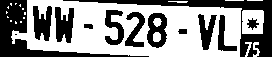

[2025/02/16 22:21:10] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0333101749420166
[2025/02/16 22:21:10] ppocr DEBUG: cls num  : 1, elapsed : 0.020370960235595703
[2025/02/16 22:21:11] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07587599754333496
EasyOCR Text: WW
PaddleOCR Text: WW-528-VL
Tesseract Text: WW -528 - VL
Final Plate Text: WW -528 - VL


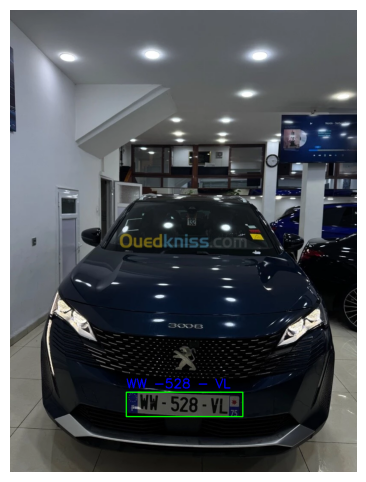

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from easyocr import Reader
from paddleocr import PaddleOCR
import pytesseract
import os
from google.colab.patches import cv2_imshow

# Load YOLO model
model = YOLO("/content/drive/MyDrive/Yolo_results/Yolo_results/best.pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/drive/MyDrive/car1.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Initialize OCR models
easyocr_reader = Reader(["en", "fr"])  # EasyOCR
paddleocr_reader = PaddleOCR(use_angle_cls=True, lang="en")  # PaddleOCR

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, binary_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run OCR (try EasyOCR, PaddleOCR, and Tesseract)
        easy_result = easyocr_reader.readtext(processed_plate)
        paddle_result = paddleocr_reader.ocr(processed_plate)
        tess_result = pytesseract.image_to_string(processed_plate, lang='eng')

        # Extract text (print results to debug)
        easy_text = easy_result[0][1] if easy_result else ""
        paddle_text = paddle_result[0][0][1][0] if paddle_result[0] else ""
        tess_text = tess_result.strip()

        print("EasyOCR Text:", easy_text)
        print("PaddleOCR Text:", paddle_text)
        print("Tesseract Text:", tess_text)

        # Choose the best OCR result
        plate_text = max([easy_text, paddle_text, tess_text], key=len)

        print("Final Plate Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


*NEWWWWWW*

In [ ]:
!pip install keras-ocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading


0: 416x640 1 licence, 41.0ms
Speed: 1.7ms preprocess, 41.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Tesseract OCR Text: ‘SNE6 XMZ


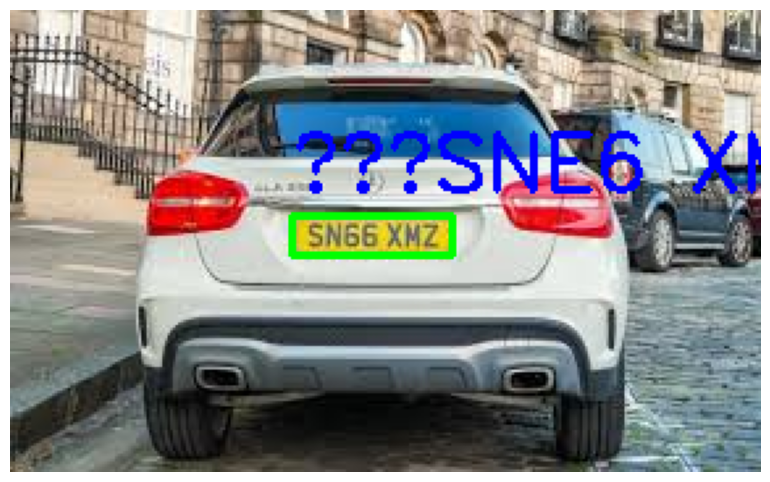

In [ ]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import os

# Load YOLO model
model = YOLO("/content/drive/MyDrive/Yolo_results/Yolo_results/best.pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/drive/MyDrive/a.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    # Apply bilateral filter to remove noise while keeping edges sharp
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to call Tesseract OCR
def tesseract_ocr(image):
    return pytesseract.image_to_string(image, lang='eng').strip()

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run Tesseract OCR
        plate_text = tesseract_ocr(processed_plate)

        print("Tesseract OCR Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
!pip install paddlepaddle paddleocr


[2025/02/16 22:31:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2025/02/16 22:31:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.043297767639160156
[2025/02/16 22:31:09] ppocr DEBUG: cls num  : 1, elapsed : 0.013239622116088867
[2025/02/16 22:31:09] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04816412925720215
PaddleOCR Text: SN66XMZ


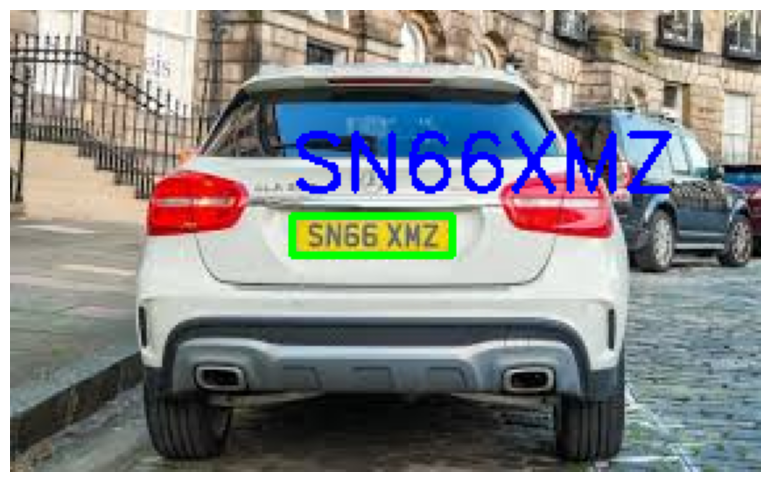

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow
import os

# Set up PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # Initialize PaddleOCR

# Load YOLO model
model = YOLO("/content/drive/MyDrive/Yolo_results/Yolo_results/best.pt")  # Change to your trained YOLO model

# Load the image
image_path = "/content/drive/MyDrive/a.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"The image path {image_path} does not exist.")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image from {image_path}.")

# Run YOLO detection
results = model(image)

# Function to preprocess the cropped plate for better OCR
def preprocess_plate(plate):
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    # Apply bilateral filter to remove noise while keeping edges sharp
    filtered_plate = cv2.bilateralFilter(gray_plate, 11, 17, 17)
    _, binary_plate = cv2.threshold(filtered_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_plate

# Function to call PaddleOCR
def paddleocr_detection(image):
    result = ocr.ocr(image)
    if result:
        return ' '.join([line[1][0] for line in result[0]])
    return ""

# Process each detected plate
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
        cropped_plate = image[y1:y2, x1:x2]  # Crop plate region

        # Preprocess the plate image
        processed_plate = preprocess_plate(cropped_plate)

        # Display the cropped license plate in grayscale
        cv2_imshow(processed_plate)

        # Run PaddleOCR
        plate_text = paddleocr_detection(processed_plate)

        print("PaddleOCR Text:", plate_text)

        # Draw bounding box on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the plate text at the top of the car image
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 30  # Adjust if near the top edge
        cv2.putText(image, plate_text, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show final image with detected plates & text
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
!git clone https://github.com/aqntks/Easy-Yolo-OCR.git


Cloning into 'Easy-Yolo-OCR'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 714 (delta 34), reused 34 (delta 34), pack-reused 655 (from 1)
Receiving objects: 100% (714/714), 124.24 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (310/310), done.
Updating files: 100% (344/344), done.


In [ ]:
%cd Easy-Yolo-OCR


/content/Easy-Yolo-OCR


In [ ]:
!pip install -r requirements.txt
